In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

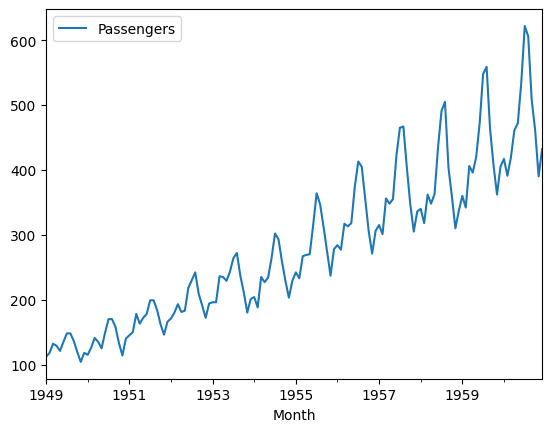

In [ ]:
df.plot()

In [ ]:
# Step 3: Perform the Augmented Dickey-Fuller (ADF) test for stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("The series is stationary")
    else:
        print("The series is non-stationary")

In [ ]:
adf_test(df['Passengers'])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
The series is non-stationary


<Axes: xlabel='Month'>

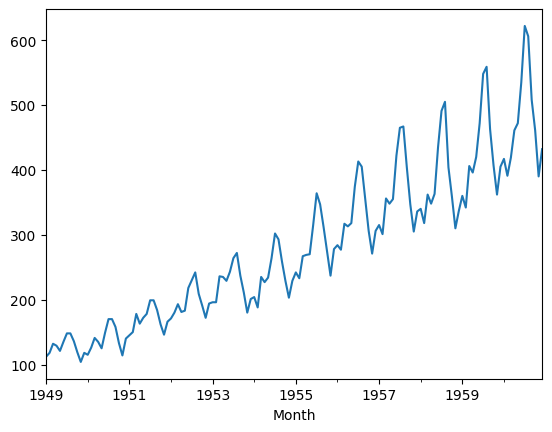

In [ ]:
df['Passengers'].plot()

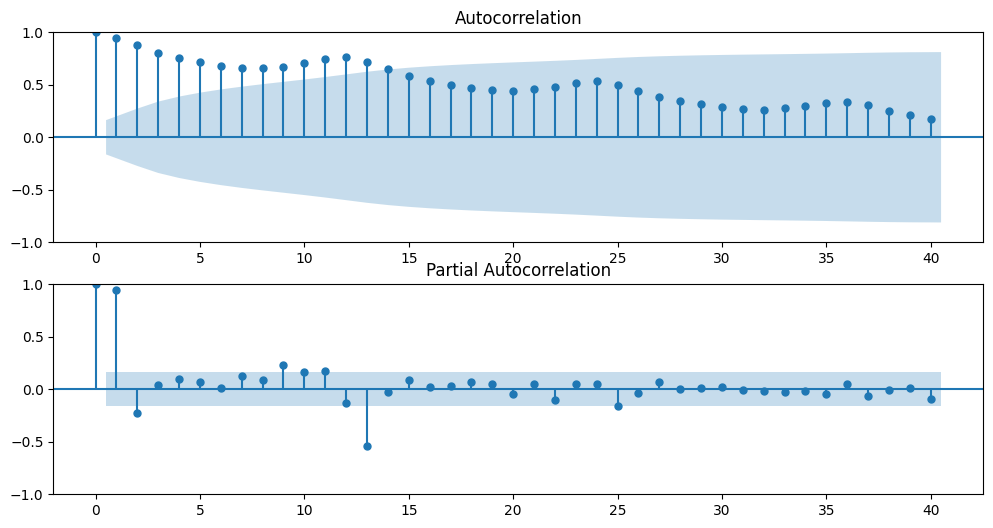

In [ ]:
# Step 4: Plot the ACF and PACF of the original series
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['Passengers'], ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(df['Passengers'], ax=plt.gca(), lags=40)
plt.show()

In [ ]:
ts_diff_1 = df["Passengers"].diff().dropna()

print("ADF Test after first differencing:")
adf_test(ts_diff_1)

ADF Test after first differencing:
ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
The series is non-stationary


<Axes: xlabel='Month'>

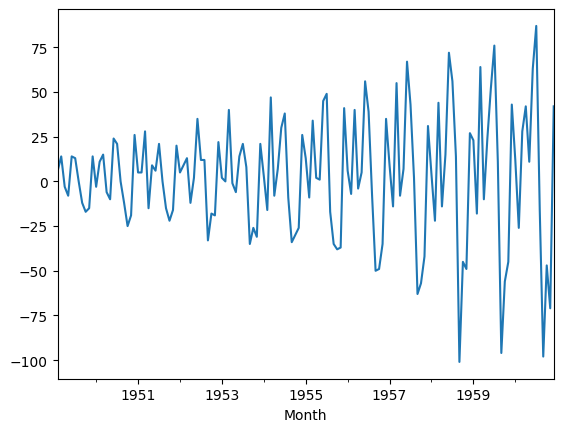

In [ ]:
ts_diff_1.plot()

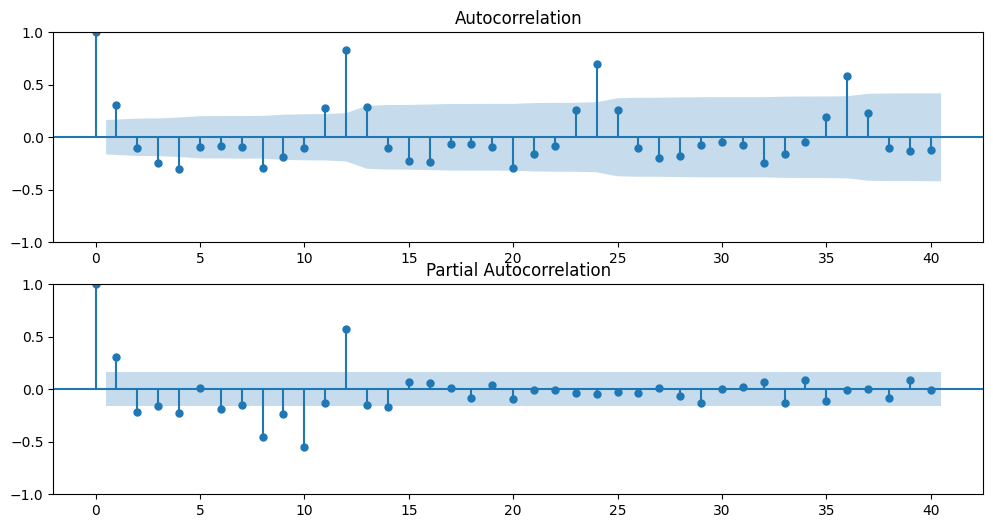

In [ ]:
# Step 4: Plot the ACF and PACF of the series
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=40)
plt.show()

In [ ]:
ts_diff_2 = ts_diff_1.diff().dropna()

print("ADF Test after first differencing:")
adf_test(ts_diff_2)

ADF Test after first differencing:
ADF Statistic: -16.384231542468513
p-value: 2.7328918500142026e-29
The series is stationary


<Axes: xlabel='Month'>

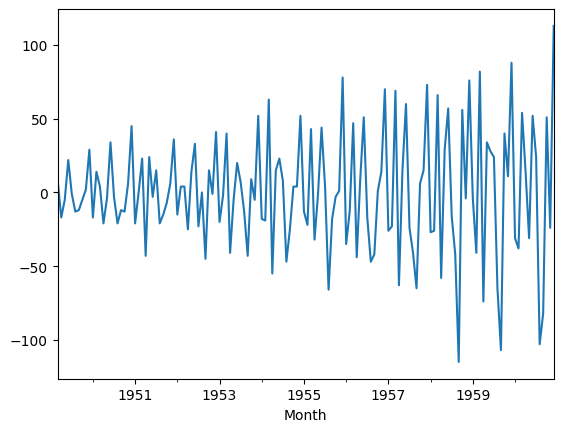

In [ ]:
ts_diff_2.plot()

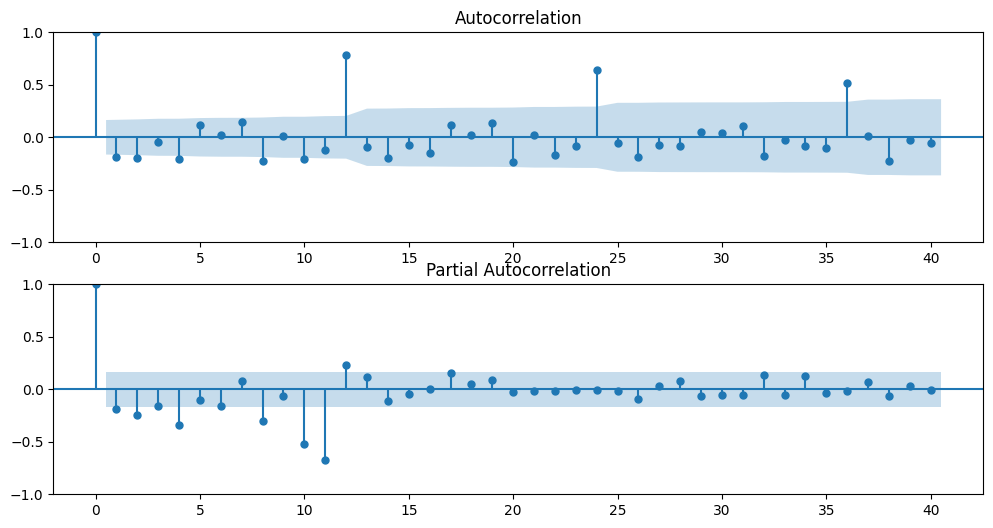

In [ ]:
# Step 4: Plot the ACF and PACF of the series
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(ts_diff_2, ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(ts_diff_2, ax=plt.gca(), lags=40)
plt.show()

In [ ]:
seasonal_difference = ts_diff_2.diff(12).dropna()
adf_test(seasonal_difference)

ADF Statistic: -8.09760023795442
p-value: 1.3261063698283747e-12
The series is stationary


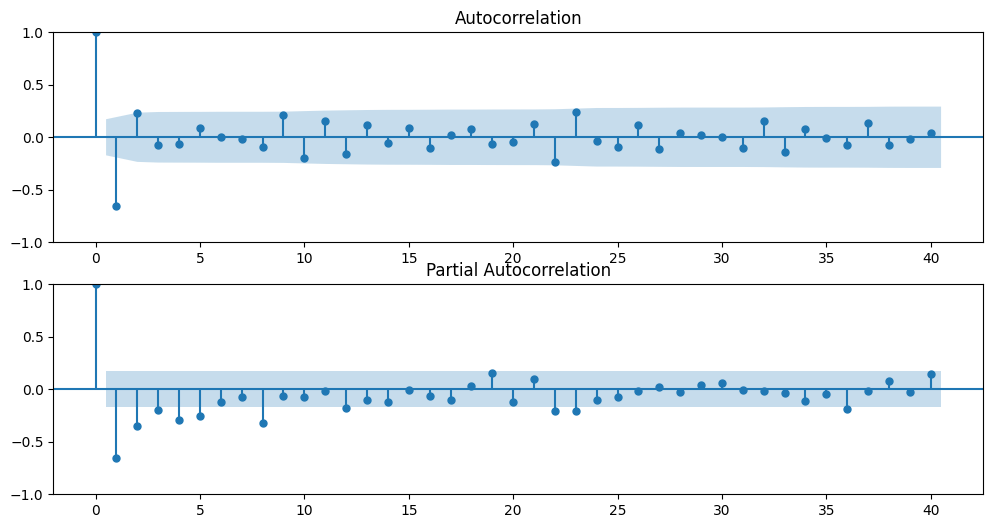

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(seasonal_difference, ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(seasonal_difference, ax=plt.gca(), lags=40)
plt.show()